In [27]:
%load_ext lab_black

from puzzles import load_lines
import numpy as np

text = load_lines(9)

import matplotlib.pyplot as plt


def show(A):
    show = A.copy()
    show[show == 9] += 20
    plt.imshow(show)
    plt.show()

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


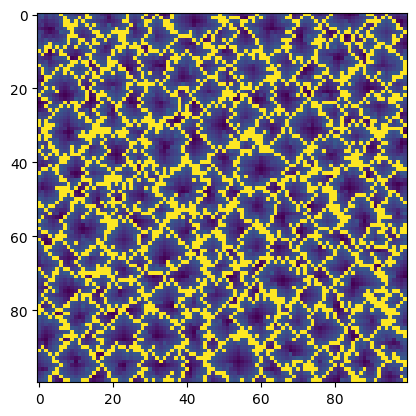

In [33]:
A = np.array([[int(x) for x in line] for line in load_lines(9)])
show(A)

# First part

In [9]:
import numpy as np

In [10]:
def build_array_from_text(s):
    lines = s.strip().split("\n")
    array = np.stack([np.array(list(line)).astype(int) for line in lines])
    return array

In [11]:
def get_neibs(i, j, array):
    shifts = np.array([[i - 1, j], [i, j - 1], [i, j + 1], [i + 1, j]])
    shifts = shifts[~(shifts < 0).any(axis=1)]
    shifts = shifts[~(shifts >= array.shape).any(axis=1)]
    return shifts

In [12]:
array = build_array_from_text(text)

In [13]:
array.shape

(100, 100)

In [5]:
S = 0
for y in range(array.shape[0]):
    for x in range(array.shape[1]):
        ys, xs = zip(*get_neibs(y, x, array))
        lowest = (array[ys, xs] > array[y, x]).all()
        if lowest:
            S += array[y, x] + 1

In [6]:
S

535

# Second part

In [38]:
from collections import deque

from tqdm import tqdm

from icecream import ic


def mark_basin(a, y, x, marked):
    area = 0
    queue = deque([(y, x)])
    while len(queue) > 0:
        # process
        y, x = queue.popleft()
        if (y, x) in marked or a[y, x] == 9:
            continue

        # add to the basin
        area += 1
        marked.add((y, x))
        a[y, x] = 9

        # expand the basin
        if y - 1 >= 0 and (y - 1, x) not in marked:
            queue.append((y - 1, x))
        if x - 1 >= 0 and (y, x - 1) not in marked:
            queue.append((y, x - 1))
        if y + 1 < len(a) and (y + 1, x) not in marked:
            queue.append((y + 1, x))
        if x + 1 < len(a[0]) and (y, x + 1) not in marked:
            queue.append((y, x + 1))

    return area

In [42]:
A = np.array([[int(x) for x in line] for line in load_lines(9)])

marked_coords = set()
areas = []

for y in range(len(A)):
    for x in range(len(A[0])):
        # if a wall — skip
        if A[y, x] == 9:
            continue
        # if a cell in seen basin — skip
        if (y, x) in marked_coords:
            continue
        # otherwise, mark a basin
        areas.append(mark_basin(A, y, x, marked_coords))

sorted(areas, reverse=True)[:3]

[109, 103, 100]

In [41]:
109 * 103 * 100

1122700